In [1]:
import math
import cv2
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [3]:
!pip install mediapipe opencv-python
!pip install opencv-python

In [5]:
import mediapipe as mp

# Initializing mediapipe pose class
mp_pose = mp.solutions.pose

# Setting up the Pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.8, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation
mp_drawing = mp.solutions.drawing_utils


In [7]:
import cv2
import matplotlib.pyplot as plt

# Use raw string to avoid escape character issues
image_path = r"C:\Users\supri\OneDrive\Desktop\exercise1.jpg"

sample_img = cv2.imread(image_path)

if sample_img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    plt.figure(figsize=[10, 10])
    plt.title("Sample Image")
    plt.axis('off')
    plt.imshow(sample_img[:, :, ::-1])  # Convert BGR to RGB
    plt.show()


Error: Could not load image at C:\Users\supri\OneDrive\Desktop\exercise1.jpg


In [9]:
# Convert the image to RGB and perform pose detection
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found
if results.pose_landmarks:
    # Iterate two times as we only want to display first two landmarks
    for i in range(2):
        landmark_enum = mp_pose.PoseLandmark(i)
        landmark = results.pose_landmarks.landmark[landmark_enum.value]

        # Display the found normalized landmarks
        print(f'{landmark_enum.name}:\n{landmark}')
else:
    print("No pose landmarks detected.")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [11]:
# Retrieve the height and width of the sample image
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found
if results.pose_landmarks:
    # Iterate two times as we only want to display first two landmarks
    for i in range(2):
        landmark_enum = mp_pose.PoseLandmark(i)
        landmark = results.pose_landmarks.landmark[landmark_enum.value]

        # Display the landmark values scaled to image size
        print(f"{landmark_enum.name}:")
        print(f"  x: {landmark.x * image_width}")
        print(f"  y: {landmark.y * image_height}")
        print(f"  z: {landmark.z * image_width}")
        print(f"  visibility: {landmark.visibility}\n")
else:
    print("No pose landmarks detected.")


AttributeError: 'NoneType' object has no attribute 'shape'

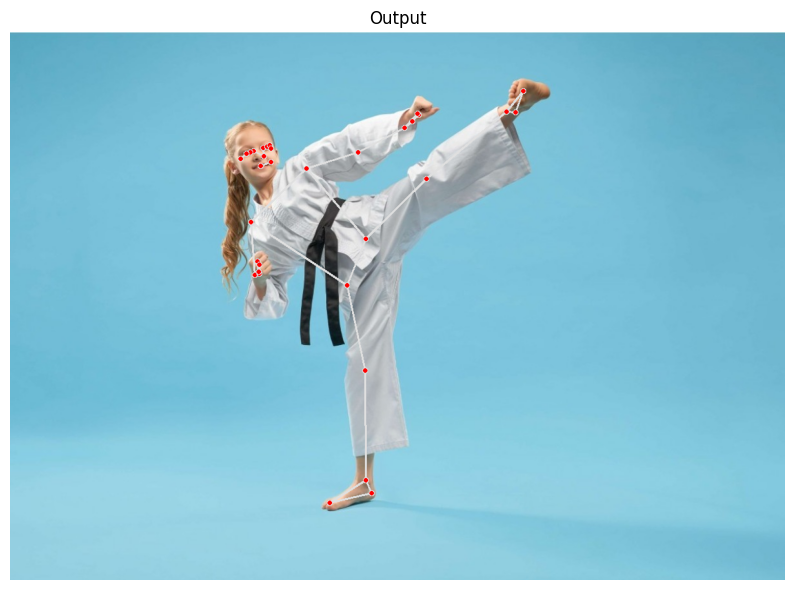

In [8]:
# Create a copy of the sample image to draw landmarks on
img_copy = sample_img.copy()

# Check if any landmarks are found
if results.pose_landmarks:
    # Draw pose landmarks on the image copy
    mp_drawing.draw_landmarks(
        image=img_copy,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS
    )

    # Specify figure size
    plt.figure(figsize=[10, 10])

    # Display the output image with landmarks drawn (convert BGR to RGB)
    plt.title("Output")
    plt.axis('off')
    plt.imshow(img_copy[:, :, ::-1])
    plt.show()
else:
    print("No pose landmarks to draw.")


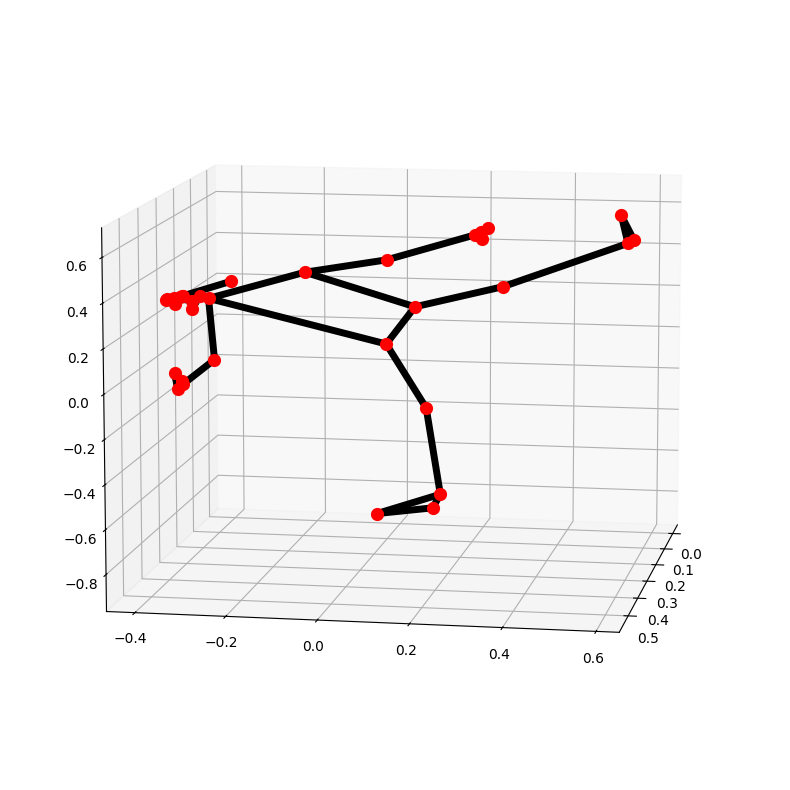

In [9]:

mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


In [13]:
def detectPose(image, pose, display=True):
    # Create a copy of the input image
    output_image = image.copy()

    # Convert the image from BGR to RGB format
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection
    results = pose.process(imageRGB)

    # Retrieve the height and width of the input image
    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks
    landmarks = []

    # Check if any landmarks are detected
    if results.pose_landmarks:
        # Draw pose landmarks on the output image
        mp_drawing.draw_landmarks(
            image=output_image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS
        )

        # Iterate over the detected landmarks
        for landmark in results.pose_landmarks.landmark:
            # Append the landmark (scaled to image size) to the list
            landmarks.append((
                int(landmark.x * width),
                int(landmark.y * height),
                landmark.z * width  # z is depth, scaled to width for consistency
            ))

        # If display is True, show the original and output images
        if display:
            plt.figure(figsize=[22, 22])

            plt.subplot(121)
            plt.imshow(image[:, :, ::-1])
            plt.title("Original Image")
            plt.axis('off')

            plt.subplot(122)
            plt.imshow(output_image[:, :, ::-1])
            plt.title("Output Image")
            plt.axis('off')

            # Also plot the pose landmarks in 3D
            mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Final return to ensure function always returns output
    return output_image, landmarks


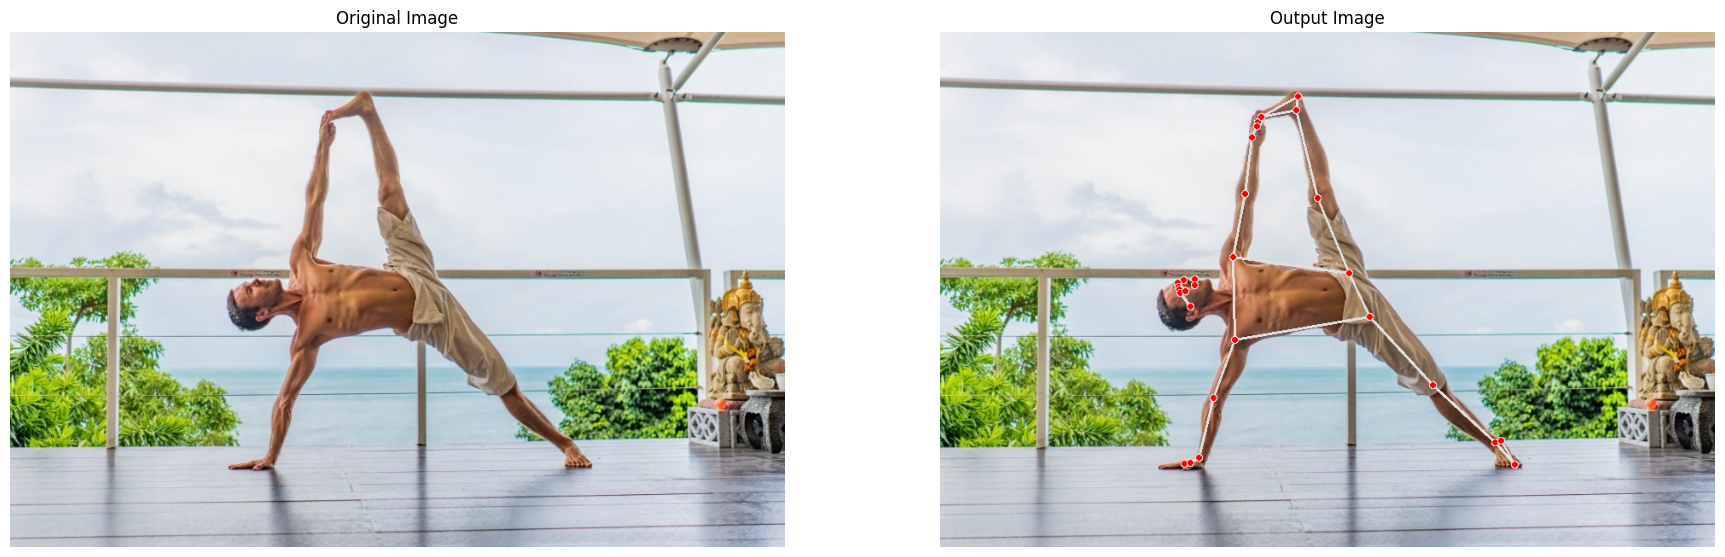

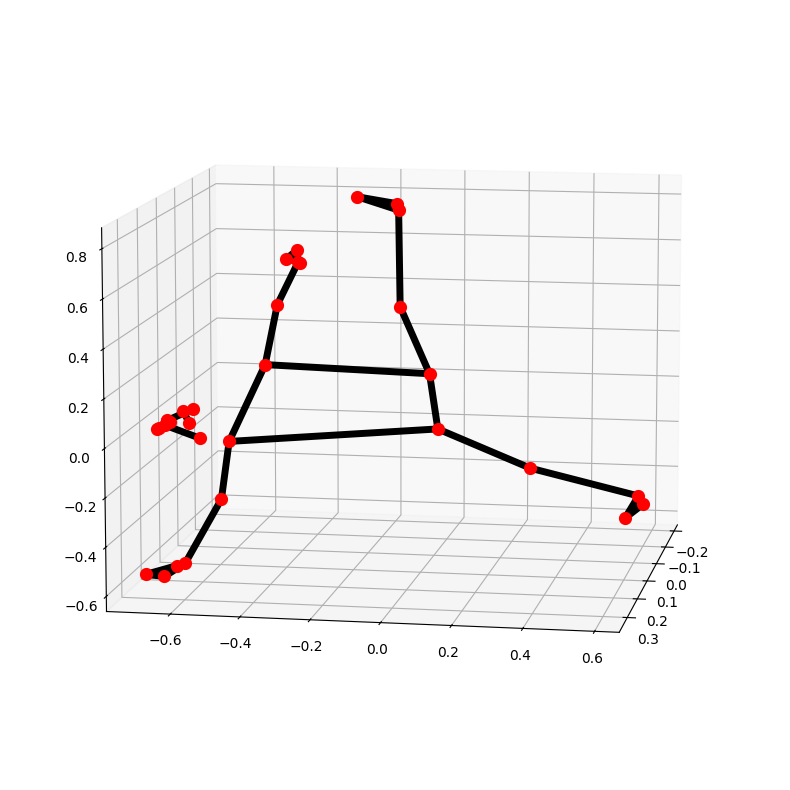

(array([[[243, 238, 237],
         [243, 238, 237],
         [243, 238, 237],
         ...,
         [147, 181, 205],
         [149, 180, 205],
         [149, 180, 205]],
 
        [[243, 238, 237],
         [243, 238, 237],
         [243, 238, 237],
         ...,
         [147, 181, 205],
         [149, 180, 205],
         [149, 180, 205]],
 
        [[243, 238, 237],
         [243, 238, 237],
         [243, 238, 237],
         ...,
         [147, 181, 204],
         [149, 181, 204],
         [149, 181, 204]],
 
        ...,
 
        [[209, 203, 196],
         [210, 204, 197],
         [212, 206, 199],
         ...,
         [223, 211, 205],
         [225, 213, 207],
         [225, 213, 207]],
 
        [[209, 203, 196],
         [210, 204, 197],
         [212, 206, 199],
         ...,
         [225, 213, 207],
         [227, 215, 209],
         [227, 215, 209]],
 
        [[209, 203, 198],
         [211, 205, 200],
         [212, 206, 201],
         ...,
         [226, 214, 208],
  

In [11]:
image = cv2.imread(r"C:\Users\supri\OneDrive\Desktop\exercise 2.jpg")
detectPose(image,pose,display =True)

In [4]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import time
import mediapipe as mp
import math
import pyttsx3
import threading  # for syncing vedio and audio
import queue  # single background TTS thread with queue

speech_queue = queue.Queue()
engine = pyttsx3.init()
engine.setProperty('rate', 150)

def tts_loop():
    while True:
        text = speech_queue.get()
        if text is None:
            break

        # Drain the queue to get the most recent message
        while not speech_queue.empty():
            text = speech_queue.get()

        engine.stop()
        engine.say(text)
        engine.runAndWait()
        speech_queue.task_done()

# Start the TTS thread
speech_thread = threading.Thread(target=tts_loop, daemon=True)
speech_thread.start()



# Initialize MediaPipe pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.6, model_complexity=1)

# Open webcam
video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Error: Could not open video source.")
    exit()

cv2.namedWindow("Pose Detection", cv2.WINDOW_NORMAL)
video.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

time1 = 0
# for text to speech
spoken_label = None  # Track last spoken pose
last_spoken_feedback = None


def speak(text):
    speech_queue.put(text)

# ---- Angle Calculation ----
def calculateAngle(landmark1, landmark2, landmark3):
    # Get coordinates
    try:
        x1, y1, z1 = landmark1.x, landmark1.y, landmark1.z
        x2, y2, z2 = landmark2.x, landmark2.y, landmark2.z
        x3, y3, z3 = landmark3.x, landmark3.y, landmark3.z

    except:
        return 0.0

    # Create vectors
    vector1 = [x1 - x2, y1 - y2, z1 - z2]
    vector2 = [x3 - x2, y3 - y2, z3 - z2]

    # Compute dot product and magnitudes
    dot_product = sum(a * b for a, b in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(a * a for a in vector1))
    magnitude2 = math.sqrt(sum(a * a for a in vector2))

    if magnitude1 * magnitude2 == 0:
        return 0.0

    # Calculate angle
    angle_rad = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_deg = math.degrees(angle_rad)

    return angle_deg


    # ---- Almost T Pose with feedback ----
def classifyPose(landmarks, output_image, display=False):
    label = "Unknown Pose"
    feedback = ""
    color = (0, 0, 255)

    # --- Angle Calculations ---
    left_elbow_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    )

    right_elbow_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    )

    left_shoulder_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    )

    right_shoulder_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    )

    left_knee_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
        landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
        landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    )

    right_knee_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]
    )

    # --- T Pose ---
    if (
        165 < left_elbow_angle < 195 and
        165 < right_elbow_angle < 195 and
        80 < left_shoulder_angle < 110 and
        80 < right_shoulder_angle < 110 and
        165 < left_knee_angle < 195 and
        165 < right_knee_angle < 195
    ):
        label = 'T Pose'
        feedback = "Good job !! Hold for a while. "
        color = (0, 255, 0)

    elif (
        140 < left_elbow_angle < 210 and
        140 < right_elbow_angle < 210 and
        60 < left_shoulder_angle < 130 and
        60 < right_shoulder_angle < 130
    ):
        label = 'Almost T Pose'
        feedback_parts = []

        if not (165 < left_elbow_angle < 195):
            feedback_parts.append("Straighten left arm")

        if not (165 < right_elbow_angle < 195):
            feedback_parts.append("Straighten right arm")

        if not (80 < left_shoulder_angle < 110):
            feedback_parts.append("Adjust left shoulder level")

        if not (80 < right_shoulder_angle < 110):
            feedback_parts.append("Adjust right shoulder level")

        if not (165 < left_knee_angle < 195):
            feedback_parts.append("Straighten left leg")

        if not (165 < right_knee_angle < 195):
            feedback_parts.append("Straighten right leg")

        feedback = ', '.join(feedback_parts)
        color = (0, 165, 255)

    # --- Warrior II Pose ---
    elif (
        (165 < left_elbow_angle < 195 or 165 < right_elbow_angle < 195) and
        (80 < left_shoulder_angle < 110 and 80 < right_shoulder_angle < 110) and
        ((165 < left_knee_angle < 195 and 90 < right_knee_angle < 120) or
         (165 < right_knee_angle < 195 and 90 < left_knee_angle < 120))
    ):
        label = 'Warrior II Pose'
        feedback = "Good job !! Hold for a while. "
        color = (0, 255, 0)

    elif (
        (150 < left_elbow_angle < 210 or 150 < right_elbow_angle < 210) and
        (65 < left_shoulder_angle < 125 and 65 < right_shoulder_angle < 125)
    ):
        label = 'Almost Warrior II'
        feedback = "Adjust shoulder alignment and bend one knee forward more."
        color = (0, 165, 255)

    # --- Tree Pose ---
    elif (
        (165 < left_knee_angle < 195 or 165 < right_knee_angle < 195) and
        (315 < left_knee_angle < 335 or 25 < right_knee_angle < 45)
    ):
        label = 'Tree Pose'
        feedback = "Good job !! Hold for a while. "
        color = (0, 255, 0)

    elif (
        (140 < left_knee_angle < 200 or 140 < right_knee_angle < 200) and
        (300 < left_knee_angle < 345 or 15 < right_knee_angle < 60)
    ):
        label = 'Almost Tree Pose'
        feedback = "Straighten standing leg, lift bent leg higher."
        color = (0, 165, 255)

    # --- Thumbs Up Pose ---
    elif (
        60 < right_elbow_angle < 100 and
        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y <
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y and
        70 < right_shoulder_angle < 120
    ):
        label = 'Thumbs Up Pose'
        feedback = "Try to make pose like(T-pose, Warrior II Pose,Tree Pose)"
        color = (0, 255, 0)

    elif (
        40 < right_elbow_angle < 120 and
        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y <
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y
    ):
        label = 'Almost Thumbs Up'
        feedback = "Raise arm a bit more for clearer thumbs up."
        color = (0, 165, 255)

    # --- Display Label and Feedback ---
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    if feedback:
        cv2.putText(output_image, feedback, (10, 60), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    return output_image, label, feedback


# ---- Pose Detection Function ----
def detectPose(image, pose_model, display=False):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose_model.process(rgb_image)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        return image, results.pose_landmarks.landmark
    else:
        return image, None

# ---- Real-time Loop ----
while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break

    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    aspect_ratio = frame_width / frame_height
    # new_width = int(aspect_ratio * 640)
    # frame = cv2.resize(frame, (new_width, 640))
    frame = cv2.resize(frame, (1280, 720))


    frame, landmarks = detectPose(frame, pose_video, display=False)

    if landmarks is not None:
        frame, label, feedback = classifyPose(landmarks, frame, display=False)
        if label != spoken_label and label not in ["Unknown Pose"]:
            speak(label)
            spoken_label = label

        if feedback and feedback != last_spoken_feedback:
            speak(feedback)
            last_spoken_feedback = feedback


    time2 = time.time()
    if (time2 - time1) > 0:
        fps = 1.0 / (time2 - time1)
        cv2.putText(frame, f'FPS: {int(fps)}', (10, 60),
                    cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 0), 2)
    time1 = time2

    cv2.imshow('Pose Detection', frame)

    if cv2.waitKey(1) & 0xFF == 27: # ESC key
        break

video.release()
cv2.destroyAllWindows()

# Gracefully stop the TTS thread
speech_queue.put(None)
speech_thread.join()